In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [3]:
from torchvision.datasets import FashionMNIST

In [4]:
train_dataset = FashionMNIST(root='data/', download=True, train=True, transform=transforms.ToTensor())
test_dataset = FashionMNIST(root='data/', download=True, train=False, transform=transforms.ToTensor())

In [7]:
model = models.resnet18(pretrained=True)

c:\Users\meshams.REDMOND\AppData\Local\anaconda3\envs\llm\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\meshams.REDMOND\AppData\Local\anaconda3\envs\llm\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\meshams.REDMOND/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 53.0MB/s]


In [8]:
# Remove the last fully connected layer to get the features
model = torch.nn.Sequential(*list(model.children())[:-1]) 

In [9]:
# Set the model to evaluation mode
model.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

Download Dogs vs. Cats dataset from https://www.kaggle.com/c/dogs-vs-cats/data
```bash
!kaggle competitions download -c dogs-vs-cats
```

In [11]:
from PIL import Image

In [24]:
def get_embedding(img_path):
  img = Image.open(img_path)
  preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = preprocess(img)
  input_batch = input_tensor.unsqueeze(0)

  with torch.no_grad():
    embeddings = model(input_batch)

  embeddings = torch.flatten(embeddings, 1)

  return embeddings

In [33]:
all_embeddings = {}

In [34]:
for i in range(100):
    for x in ['cat', 'dog']:
      img_path = f'./dogs-vs-cats/train/{x}.{i+1}.jpg'
      e = get_embedding(img_path)
      all_embeddings[img_path] = e

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

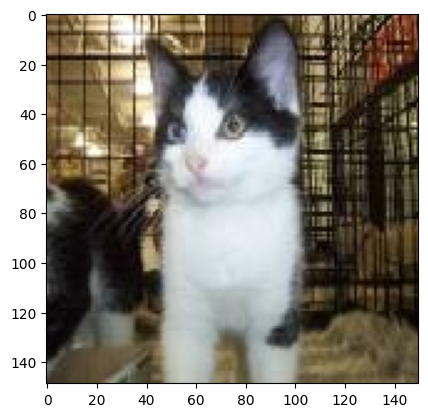

In [30]:
img_path = './dogs-vs-cats/train/cat.1000.jpg'
img = Image.open(img_path)
plt.imshow(img)

In [31]:
emb = get_embedding(img_path)

In [37]:
embedding_scope = {}
for img_path, emb in all_embeddings.items():
    sim = cosine_similarity(emb, e)
    embedding_scope[img_path] = sim

In [42]:
temp = {k: v for k, v in reversed(sorted(embedding_scope.items(), key=lambda item: item[1]))}

In [43]:
temp

{'./dogs-vs-cats/train/dog.100.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/cat.100.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/dog.99.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/cat.99.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/dog.98.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/cat.98.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/dog.97.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/cat.97.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/dog.96.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/cat.96.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/dog.95.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/cat.95.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/dog.94.jpg': array([[1.0000001]], dtype=float32),
 './dogs-vs-cats/train/cat.94.jpg': array([[1.000